In [1]:
from functions import *
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
!pwd

/home/pekudrjavtseva/transformers/notebooks


In [18]:
PRETRAINED_PATH = '/home/pekudrjavtseva/transformers/checkpoints/rest/rest_base.pth'

LABELS_PATH = '/home/pekudrjavtseva/transformers/data/dogs/labels.csv'

MODEL_SAVE_PATH = '/home/pekudrjavtseva/transformers/models/rest.pth'

MODEL_SAVE_PATH_SHORT = '/home/pekudrjavtseva/transformers/models/rest_short.pth'

TRAIN_DIR = Path('/home/pekudrjavtseva/transformers/data/dogs/train')

TEST_DIR = Path('/home/pekudrjavtseva/transformers/data/dogs/test')

TRAIN_DIR_SHORT = Path('/home/pekudrjavtseva/transformers/data/dogs_short')

RESULT_PATH_FULL = '/home/pekudrjavtseva/transformers/predictions/rest_full.csv'

RESULT_PATH_SHORT = '/home/pekudrjavtseva/transformers/predictions/rest_short.csv'

DEVICE = torch.device("cuda")

In [4]:
%cd ../image-classification

/home/pekudrjavtseva/transformers/image-classification


In [5]:
from tools.show import show_models

show_models()

Model Names    Model Variants
-------------  --------------------------------
ResNet         ['18', '34', '50', '101', '152']
MicroNet       ['M1', 'M2', 'M3']
GFNet          ['T', 'S', 'B']
PVTv2          ['B1', 'B2', 'B3', 'B4', 'B5']
ResT           ['S', 'B', 'L']
Conformer      ['T', 'S', 'B']
Shuffle        ['T', 'S', 'B']
CSWin          ['T', 'S', 'B', 'L']
CycleMLP       ['B1', 'B2', 'B3', 'B4', 'B5']
XciT           ['T', 'S', 'M', 'L']
VOLO           ['D1', 'D2', 'D3', 'D4']


In [6]:
ls ~/transformers/checkpoints/rest/rest_base.pth

/home/pekudrjavtseva/transformers/checkpoints/rest/rest_base.pth


In [7]:
from models import get_model


model = get_model('ResT', 'B', pretrained=PRETRAINED_PATH)

In [8]:
d = create_labels(LABELS_PATH)

In [9]:
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))

train_val_labels = [d[path.name] for path in train_val_files]

test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
 stratify=train_val_labels)

train_dataset = DogsDataset(train_files, mode='train', label_path = LABELS_PATH)

val_dataset = DogsDataset(val_files, mode='val', label_path = LABELS_PATH)

test_dataset = DogsDataset(test_files, mode='test', label_path = LABELS_PATH)

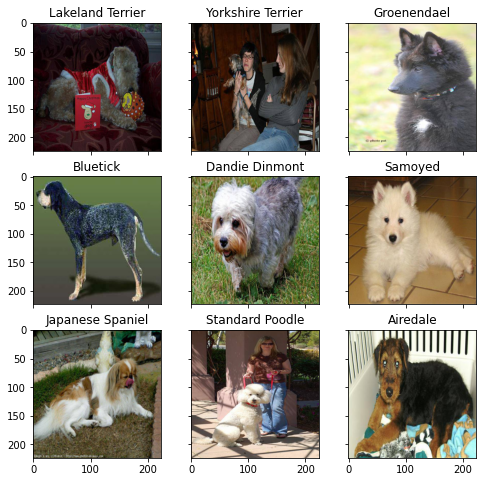

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), sharey=True, sharex=True)
for fig_x in ax.flatten():
 random_characters = int(np.random.uniform(0,1000))
 im_val, label = train_dataset[random_characters]
 img_label = " ".join(map(lambda x: x.capitalize(),\
 val_dataset.label_encoder.inverse_transform([label])[0].split('_')))

 imshow(im_val.data.cpu(), \
 title=img_label,plt_ax=fig_x)

In [12]:
torch.cuda.empty_cache()
name = MODEL_SAVE_PATH

torch.cuda.set_device(3)

opt = torch.optim.AdamW(model.parameters(), lr=3e-5, amsgrad=True)
history = train(train_dataset, val_dataset, model= model.cuda(), opt = opt, epochs=10, batch_size=16, name = name)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 2.068375122195711


epoch:  10%|█         | 1/10 [01:16<11:28, 76.52s/it]

Saved model with val acc 0.7926447574334898

Epoch 001 train_loss: 2.0684   val_loss 0.6748 train_acc 0.5226 val_acc 0.7926
loss 0.41884405968408034


epoch:  20%|██        | 2/10 [02:31<10:08, 76.08s/it]

Saved model with val acc 0.8204225352112676

Epoch 002 train_loss: 0.4188   val_loss 0.5817 train_acc 0.8707 val_acc 0.8204
loss 0.13962753815491394


epoch:  30%|███       | 3/10 [03:47<08:51, 75.92s/it]

Saved model with val acc 0.8427230046948357

Epoch 003 train_loss: 0.1396   val_loss 0.5777 train_acc 0.9581 val_acc 0.8427
loss 0.04136175347237947


epoch:  40%|████      | 4/10 [05:02<07:34, 75.77s/it]

Saved model with val acc 0.8462441314553991

Epoch 004 train_loss: 0.0414   val_loss 0.5618 train_acc 0.9902 val_acc 0.8462
loss 0.012665815004010308


epoch:  50%|█████     | 5/10 [06:17<06:18, 75.66s/it]

Saved model with val acc 0.8556338028169014

Epoch 005 train_loss: 0.0127   val_loss 0.5561 train_acc 0.9990 val_acc 0.8556
loss 0.00727167342027259


epoch:  60%|██████    | 6/10 [07:33<05:02, 75.58s/it]

Saved model with val acc 0.8575899843505478

Epoch 006 train_loss: 0.0073   val_loss 0.5542 train_acc 0.9991 val_acc 0.8576
loss 0.005294760453939718


epoch:  70%|███████   | 7/10 [08:48<03:46, 75.46s/it]


Epoch 007 train_loss: 0.0053   val_loss 0.5694 train_acc 0.9991 val_acc 0.8556
loss 0.004326435419728534


epoch:  80%|████████  | 8/10 [10:03<02:30, 75.40s/it]

Saved model with val acc 0.8583724569640063

Epoch 008 train_loss: 0.0043   val_loss 0.5833 train_acc 0.9995 val_acc 0.8584
loss 0.00350714981509895


epoch:  90%|█████████ | 9/10 [11:19<01:15, 75.36s/it]


Epoch 009 train_loss: 0.0035   val_loss 0.5881 train_acc 0.9993 val_acc 0.8576
loss 0.003309644456911383


epoch: 100%|██████████| 10/10 [12:34<00:00, 75.46s/it]


Epoch 010 train_loss: 0.0033   val_loss 0.5914 train_acc 0.9992 val_acc 0.8584


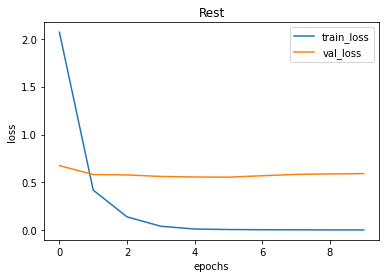

In [13]:
plot(history, "Rest")

In [14]:
def make_prediction(name, model, test_files):
    checkpoint = torch.load(name)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    test_dataset = DogsDataset(test_files, mode='test', label_path = LABELS_PATH)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64, num_workers=2)

    probs = predict(model, test_loader)
    label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

    result = pd.DataFrame(columns = label_encoder.inverse_transform(np.arange(0, 120)))

    result['id'] = [path.name.split('.')[0] for path in test_files]

    for i in range(len(test_files)):
        result.iloc[i, :-1] = probs[i][:120]

    return result

In [15]:
res = make_prediction(name, model, test_files)
res.to_csv(RESULT_PATH_FULL, index = False)

Kaggle score 0.56123

In [16]:
train_val_files_short = sorted(list(TRAIN_DIR_SHORT.rglob('*.jpg')))

train_val_labels_short = [d[path.name] for path in train_val_files_short]

train_files_short, val_files_short = train_test_split(train_val_files_short, test_size=0.25, \
 stratify=train_val_labels_short)

train_dataset_short = DogsDataset(train_files_short, mode='train',  label_path = LABELS_PATH)

val_dataset_short = DogsDataset(val_files_short, mode='val',  label_path = LABELS_PATH)

In [19]:
torch.cuda.empty_cache()

model = get_model('ResT', 'B', pretrained=PRETRAINED_PATH)
name = MODEL_SAVE_PATH_SHORT


opt = torch.optim.AdamW(model.parameters(), lr=3e-5, amsgrad=True)
history = train(train_dataset_short, val_dataset_short, model= model.cuda(), opt = opt, epochs=10, batch_size=16, name = name)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 5.450995476249178


epoch:  10%|█         | 1/10 [00:28<04:16, 28.51s/it]

Saved model with val acc 0.15336787564766838

Epoch 001 train_loss: 5.4510   val_loss 4.1919 train_acc 0.0211 val_acc 0.1534
loss 1.7200071179767862


epoch:  20%|██        | 2/10 [00:57<03:48, 28.60s/it]

Saved model with val acc 0.7647668393782383

Epoch 002 train_loss: 1.7200   val_loss 0.8405 train_acc 0.5954 val_acc 0.7648
loss 0.2609115760891929


epoch:  30%|███       | 3/10 [01:25<03:20, 28.57s/it]


Epoch 003 train_loss: 0.2609   val_loss 0.8217 train_acc 0.9257 val_acc 0.7440
loss 0.0742215696428574


epoch:  40%|████      | 4/10 [01:54<02:51, 28.65s/it]

Saved model with val acc 0.8093264248704662

Epoch 004 train_loss: 0.0742   val_loss 0.6536 train_acc 0.9827 val_acc 0.8093
loss 0.01858765770259982


epoch:  50%|█████     | 5/10 [02:23<02:23, 28.72s/it]


Epoch 005 train_loss: 0.0186   val_loss 0.6807 train_acc 0.9976 val_acc 0.8031
loss 0.007389504847633311


epoch:  60%|██████    | 6/10 [02:52<01:55, 28.75s/it]


Epoch 006 train_loss: 0.0074   val_loss 0.6488 train_acc 1.0000 val_acc 0.8073
loss 0.004571632431230069


epoch:  70%|███████   | 7/10 [03:21<01:26, 28.76s/it]


Epoch 007 train_loss: 0.0046   val_loss 0.6552 train_acc 1.0000 val_acc 0.8083
loss 0.003519396313735352


epoch:  80%|████████  | 8/10 [03:50<00:57, 28.92s/it]

Saved model with val acc 0.8113989637305699

Epoch 008 train_loss: 0.0035   val_loss 0.6606 train_acc 1.0000 val_acc 0.8114
loss 0.0028960830731675504


epoch:  90%|█████████ | 9/10 [04:19<00:29, 29.08s/it]

Saved model with val acc 0.8134715025906736

Epoch 009 train_loss: 0.0029   val_loss 0.6650 train_acc 1.0000 val_acc 0.8135
loss 0.0024513291442357157


epoch: 100%|██████████| 10/10 [04:48<00:00, 28.88s/it]


Epoch 010 train_loss: 0.0025   val_loss 0.6678 train_acc 1.0000 val_acc 0.8135


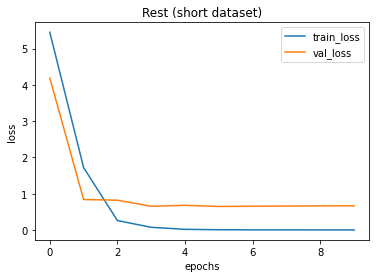

In [20]:
plot(history, "Rest (short dataset)")

In [21]:
res = make_prediction(name, model, test_files)
res.to_csv(RESULT_PATH_SHORT, index = False)

Kaggle score 0.68494